<a href="https://colab.research.google.com/github/Saidul-1/CSE4132-Artificial-Intelligence-Lab/blob/main/Assighment10_VGG16_Transfer_learning_Binary_Classifier_Lichi%26Mahogany_leaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a report in pdf format using any Latex system after:
* training a binary classifier, based on the pre-trained VGG16, by transfer learning
and fine tuning.
* showing the effect of fine-tuning:
  i. whole pre-trained VGG16
  ii. partial pre-trained VGG16

In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, RandomFlip, RandomRotation, RandomZoom, RandomBrightness, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import time

In [ ]:
def preprocess_dataset():
  dataset = np.load('/content/drive/MyDrive/leaf_binary_dataset.npz')
  trainX = dataset['trainX']
  trainY = dataset['trainY']
  testX = dataset['testX']
  testY = dataset['testY']

  trainX = trainX.astype('float32')/255.0
  testX = testX.astype('float32')/255.0

  trainY = to_categorical(trainY, 2)
  testY = to_categorical(testY, 2)

  return (trainX, trainY), (testX, testY)

In [ ]:
def build_model(input_shape):

  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

  # Transfer learning
  base_model.trainable = False   # freeze all layers
  learning_rate = 0.0001

  # # Whole Fine-Tuning
  # base_model.trainable = True
  # learning_rate = 1e-5

  # # Partial Fine-Tuning
  # base_model.trainable = True
  # learning_rate = 1e-5
  # for layer in base_model.layers:
  #   if "block5" not in layer.name:
  #       layer.trainable = False

  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  x = Dense(128, activation='relu')(x)

  outputs = Dense(2, activation = 'sigmoid')(x)

  model = Model(inputs=base_model.input, outputs=outputs)
  model.summary(show_trainable=True)
  model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def train_model(my_model, trainX, trainY, training_epochs):
  history = my_model.fit(
      trainX, trainY,
      validation_split = 0.2,
      epochs = training_epochs,
  )
  return history

In [ ]:
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Epoch vs Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Epoch vs Loss')
    plt.legend()

    plt.show()

In [ ]:
def sample_prediction_plot(testX, testY_labels, predY_labels):
  class_names = ['Lichi_leaf', 'Mahogany_leaf']
  plt.figure(figsize=(10, 10))
  num_samples, rows, cols = 25, 5, 5
  for i in range(min(num_samples, len(testX))):
      plt.subplot(rows, cols, i+1)
      plt.axis('off')
      plt.imshow(testX[i])
      color = 'green' if(testY_labels[i] == predY_labels[i]) else 'red'
      plt.title(f'True: {class_names[testY_labels[i]]},\n Pred: {class_names[predY_labels[i]]}', color=color)
  plt.suptitle(f'Sample Predictions from Test Set')
  plt.tight_layout()
  plt.show()

In [ ]:
def main():
  (trainX, trainY), (testX, testY) = preprocess_dataset()
  print(trainX.shape)
  print(trainY.shape)

  model = build_model(trainX.shape[1:])

  start_train = time.time()
  history = train_model(model, trainX, trainY, 20)
  end_train = time.time()
  print(f'Training time: {end_train - start_train} seconds')

  plot_history(history)

  start_test = time.time()
  predY = model.predict(testX)
  end_test = time.time()
  test_time_per_sample = (end_test - start_test) / len(testX)
  print(f"Testing Time per Sample: {test_time_per_sample:.4f} seconds")

  predY_labels = np.argmax(predY, axis=1)
  testY_labels = np.argmax(testY, axis=1)
  sample_prediction_plot(testX, testY_labels, predY_labels)
  accuracy = accuracy_score(testY_labels, predY_labels)
  print(f'Accuracy: {accuracy}')

(1031, 224, 224, 3)
(1031, 2)
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer (InputLayer)    │ (None, 224, 224, 3)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_conv1 (Conv2D)       │ (None, 224, 224, 64)  │      1,792 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_conv2 (Conv2D)       │ (None, 224, 224, 64)  │     36,928 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_pool (MaxPooling2D)  │ (None, 112, 112, 64)  │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_conv1 (Conv2D)       │ (None, 112, 112, 128) │     73,856 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_conv2 (Conv2D)       │ (None, 112, 112, 128) │    147,584 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_pool (MaxPooling2D)  │ (None, 56, 56, 128)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv1 (Conv2D)       │ (None, 56, 56, 256)   │    295,168 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv2 (Conv2D)       │ (None, 56, 56, 256)   │    590,080 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv3 (Conv2D)       │ (None, 56, 56, 256)   │    590,080 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_pool (MaxPooling2D)  │ (None, 28, 28, 256)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv1 (Conv2D)       │ (None, 28, 28, 512)   │  1,180,160 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv2 (Conv2D)       │ (None, 28, 28, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv3 (Conv2D)       │ (None, 28, 28, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_pool (MaxPooling2D)  │ (None, 14, 14, 512)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv1 (Conv2D)       │ (None, 14, 14, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv2 (Conv2D)       │ (None, 14, 14, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv3 (Conv2D)       │ (None, 14, 14, 512)   │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_pool (MaxPooling2D)  │ (None, 7, 7, 512)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ global_average_pooling2d    │ (None, 512)           │          0 │   -   │
│ (GlobalAveragePooling2D)    │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense (Dense)               │ (None, 128)           │     65,664 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_1 (Dense)             │ (None, 2)             │        258 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 14,780,610 (56.38 MB)

 Trainable params: 65,922 (257.51 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.5394 - loss: 0.7500 - val_accuracy: 0.4783 - val_loss: 0.7035
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - accuracy: 0.5567 - loss: 0.6814 - val_accuracy: 0.5411 - val_loss: 0.6867
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - accuracy: 0.5911 - loss: 0.6765 - val_accuracy: 0.5942 - val_loss: 0.6783
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/step - accuracy: 0.6152 - loss: 0.6731 - val_accuracy: 0.5894 - val_loss: 0.6726
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 249ms/step - accuracy: 0.6123 - loss: 0.6686 - val_accuracy: 0.5845 - val_loss: 0.6679
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 255ms/step - accuracy: 0.6173 - loss: 0.6606 - val_accuracy: 0.5942 - val_loss: 0.6606
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 257ms/step - accuracy: 0.6702 - loss: 0.6541 - val_accuracy: 0.6570 - val_loss: 0.6536
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 257ms/step - accuracy: 0.6403 - loss: 0.6467 - val_accuracy: 0.67

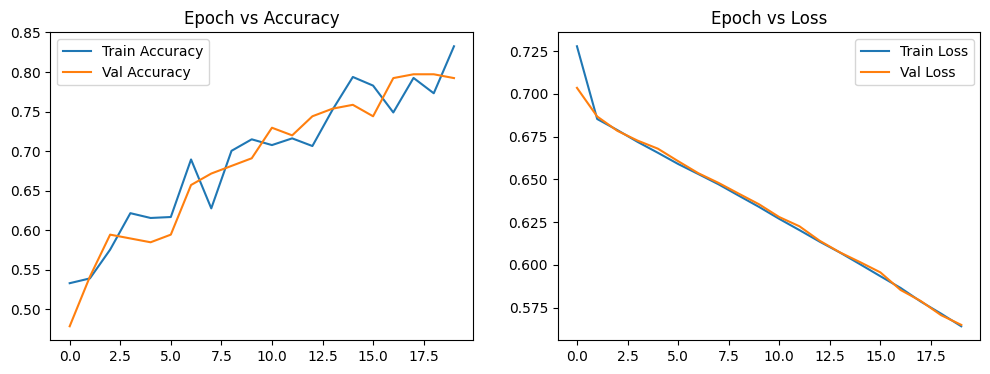

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 445ms/step
Testing Time per Sample: 0.0193 seconds


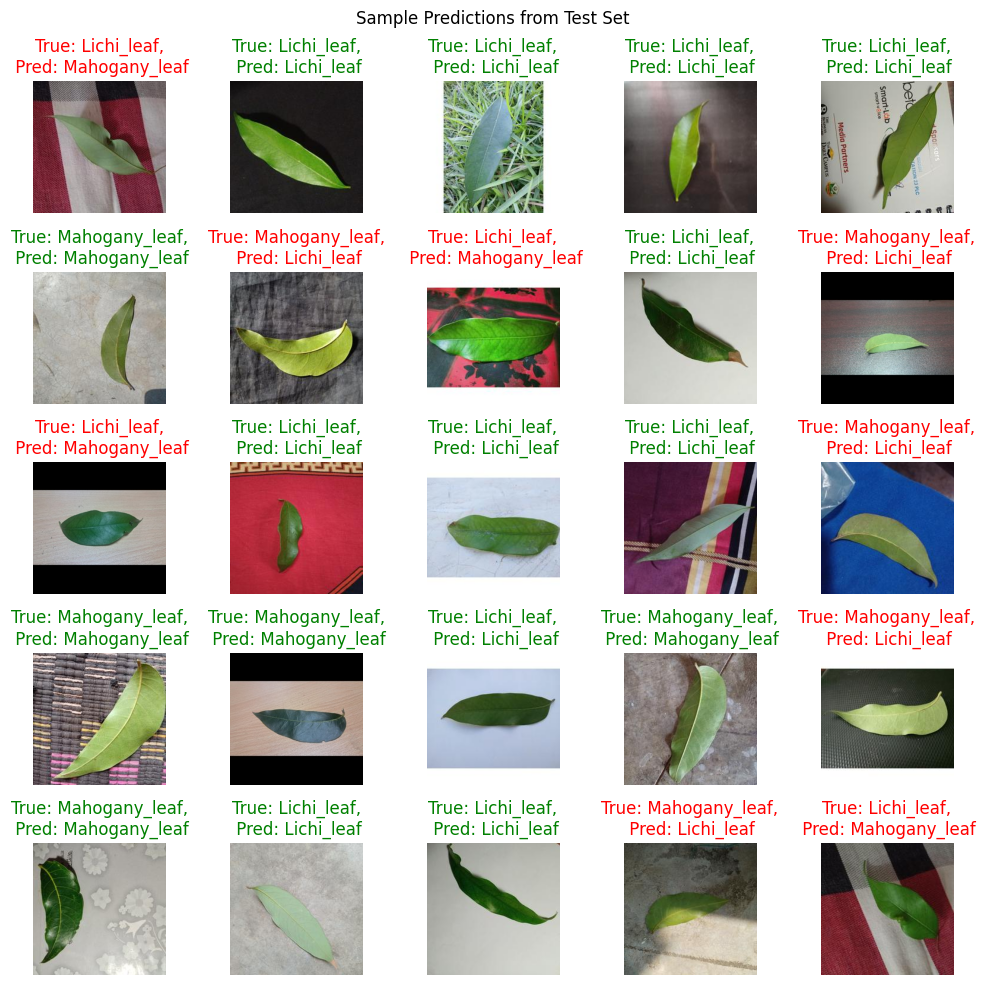

Accuracy: 0.775


In [ ]:
if __name__ == '__main__':
    main()